# Fase 2 – Modelo de Riscos Proporcionais de Cox

resíduos de Schoenfeld

In [ ]:
setwd('')
getwd()
# chamar pacotes survival, DBI (para ligar base-de-dados), ggplot2 (graficos)
library(survival)
library(DBI)
library(ggplot2)
library(plyr)
library("IRdisplay")

In [16]:
#ligar a base de dados foot.db
foot <- dbConnect(RSQLite::SQLite(), "foot.db")

In [17]:
sch <- dbGetQuery(foot, 'SELECT tempo, cens, equip, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)
ligas <- c(rep(1,1347),rep(2,1781),rep(3,1443),rep(4,1808),rep(5,1788),rep(6,1836))
temp <- sch$tempo
cens <- sch$cens
equip <- sch$equip
odds1 <- as.numeric(sch$odds)

In [18]:
fit <- coxph(Surv(temp, cens) ~ equip + odds1 + factor(ligas))
summary(fit)
beta1 <- fit$coefficients[1]
beta2 <- fit$coefficients[2]
beta1
beta2
rsch <- resid(fit, type="scaledsch")
summary(rsch)

Call:
coxph(formula = Surv(temp, cens) ~ equip + odds1 + factor(ligas))

  n= 10003, number of events= 9203 

                    coef exp(coef)  se(coef)      z Pr(>|z|)    
equip           0.436090  1.546647  0.022072 19.758  < 2e-16 ***
odds1          -0.023519  0.976755  0.005491 -4.283 1.84e-05 ***
factor(ligas)2  0.036058  1.036716  0.037748  0.955  0.33945    
factor(ligas)3  0.113446  1.120132  0.039485  2.873  0.00406 ** 
factor(ligas)4  0.015749  1.015874  0.037681  0.418  0.67598    
factor(ligas)5 -0.029630  0.970805  0.037823 -0.783  0.43341    
factor(ligas)6  0.019954  1.020154  0.037515  0.532  0.59480    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
equip             1.5466     0.6466    1.4812    1.6150
odds1             0.9768     1.0238    0.9663    0.9873
factor(ligas)2    1.0367     0.9646    0.9628    1.1163
factor(ligas)3    1.1201     0.8928    1.0367    1.2103
factor(ligas)4    1.01

equip 
0.4360896

odds1 
-0.02351921

       V1                V2                 V3                 V4          
 Min.   :-6.2505   Min.   :-0.71523   Min.   :-7.61673   Min.   :-7.61582  
 1st Qu.:-1.4380   1st Qu.:-0.31494   1st Qu.:-0.03839   1st Qu.:-0.03374  
 Median :-0.9017   Median :-0.16941   Median : 0.01259   Median : 0.08167  
 Mean   : 0.4361   Mean   :-0.02352   Mean   : 0.03606   Mean   : 0.11345  
 3rd Qu.: 2.8812   3rd Qu.: 0.02575   3rd Qu.: 0.14824   3rd Qu.: 0.27259  
 Max.   : 5.2012   Max.   : 6.27632   Max.   : 6.88356   Max.   : 8.35360  
       V5                  V6                 V7          
 Min.   :-7.687687   Min.   :-7.83926   Min.   :-7.69285  
 1st Qu.:-0.119246   1st Qu.:-0.20519   1st Qu.:-0.11499  
 Median :-0.001692   Median :-0.10188   Median :-0.03080  
 Mean   : 0.015749   Mean   :-0.02963   Mean   : 0.01995  
 3rd Qu.: 0.188881   3rd Qu.: 0.23458   3rd Qu.: 0.23302  
 Max.   : 6.317800   Max.   : 7.48478   Max.   : 6.69000  

                     rho    chisq        p
equip           1.79e-01 3.12e+02 9.14e-70
odds1          -3.34e-02 1.19e+01 5.64e-04
factor(ligas)2 -9.33e-05 8.01e-05 9.93e-01
factor(ligas)3  3.93e-03 1.42e-01 7.06e-01
factor(ligas)4  9.76e-03 8.78e-01 3.49e-01
factor(ligas)5  1.82e-02 3.06e+00 8.04e-02
factor(ligas)6  1.17e-02 1.26e+00 2.62e-01
GLOBAL                NA 3.17e+02 1.38e-64

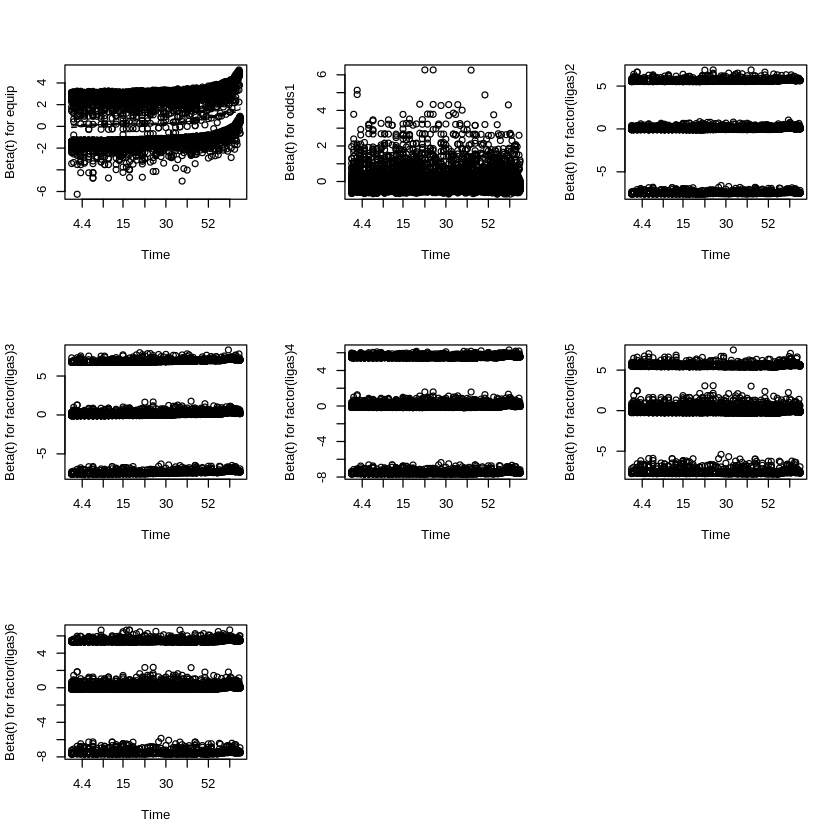

In [19]:
cox.zph(fit, transform="identity")
par(mfrow=c(3,3))
plot(cox.zph(fit))

In [8]:
fit <- coxph(Surv(temp, cens) ~ equip)
summary(fit)
beta1 <- fit$coefficients[1]
beta1

Call:
coxph(formula = Surv(temp, cens) ~ equip)

  n= 10505, number of events= 9664 

         coef exp(coef) se(coef)     z Pr(>|z|)    
equip 0.41437   1.51341  0.02101 19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
equip     1.513     0.6608     1.452     1.577

Concordance= 0.531  (se = 0.003 )
Rsquare= 0.036   (max possible= 1 )
Likelihood ratio test= 379.9  on 1 df,   p=0
Wald test            = 389.1  on 1 df,   p=0
Score (logrank) test = 394.4  on 1 df,   p=0


equip 
0.4143687

        rho chisq p
equip 0.175   317 0

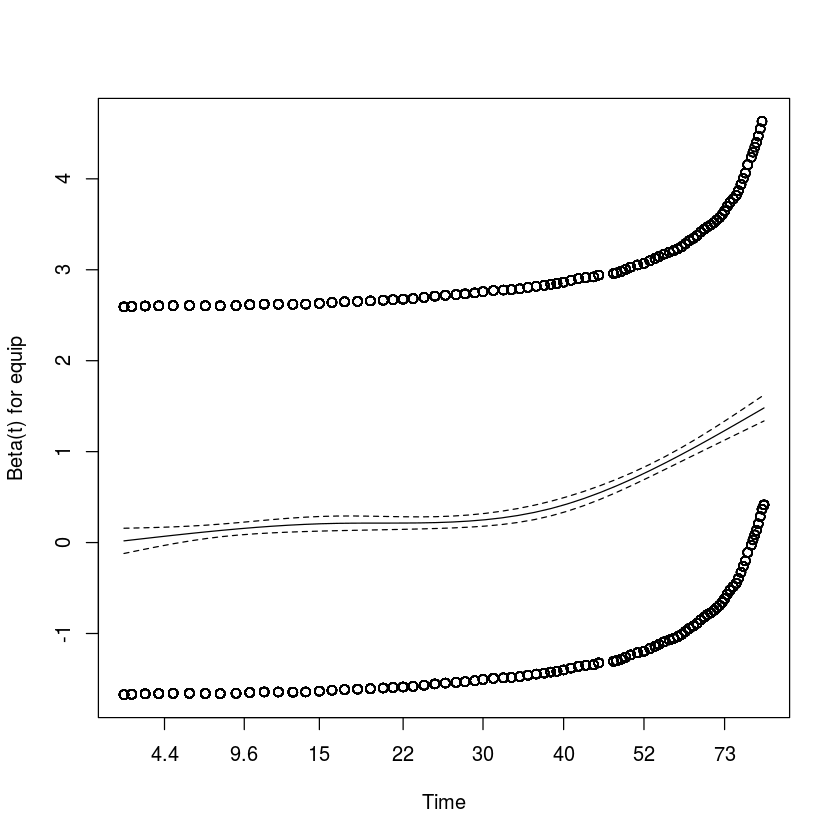

In [9]:
cox.zph(fit, transform="identity")
par(mfrow=c(1,1))
plot(cox.zph(fit))

In [10]:
fit <- coxph(Surv(temp, cens) ~ factor(ligas))
summary(fit)
beta1 <- fit$coefficients[1]
beta1

Call:
coxph(formula = Surv(temp, cens) ~ factor(ligas))

  n= 10505, number of events= 9664 

                    coef exp(coef)  se(coef)      z Pr(>|z|)   
factor(ligas)1  0.033678  1.034252  0.036811  0.915   0.3603   
factor(ligas)2  0.112588  1.119171  0.038554  2.920   0.0035 **
factor(ligas)3  0.003146  1.003151  0.036851  0.085   0.9320   
factor(ligas)4 -0.041011  0.959818  0.036865 -1.112   0.2659   
factor(ligas)5  0.004964  1.004976  0.036789  0.135   0.8927   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(ligas)1    1.0343     0.9669    0.9623     1.112
factor(ligas)2    1.1192     0.8935    1.0377     1.207
factor(ligas)3    1.0032     0.9969    0.9333     1.078
factor(ligas)4    0.9598     1.0419    0.8929     1.032
factor(ligas)5    1.0050     0.9950    0.9351     1.080

Concordance= 0.514  (se = 0.003 )
Rsquare= 0.002   (max possible= 1 )
Likelihood ratio test= 19.94  on 5 df,   p=0.00

factor(ligas)1 
    0.03367807

                     rho   chisq      p
factor(ligas)1 -0.001956 0.03696 0.8475
factor(ligas)2 -0.000841 0.00684 0.9341
factor(ligas)3  0.003107 0.09332 0.7600
factor(ligas)4  0.018667 3.36736 0.0665
factor(ligas)5  0.010053 0.97676 0.3230
GLOBAL                NA 7.07801 0.2149

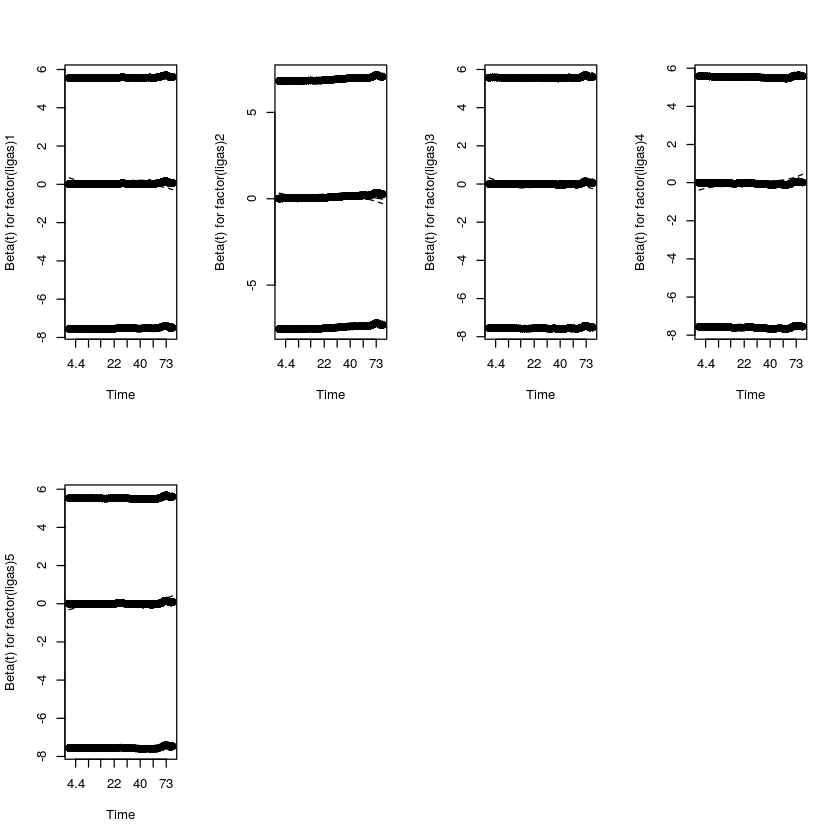

In [11]:
cox.zph(fit, transform="identity")
par(mfrow=c(2,4))
plot(cox.zph(fit))